In [51]:
import sys
import pickle
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [154]:
df = pd.read_pickle('camera_ready_tensor_results_df.pkl')
df = df[df.model_type != 'bptf']

df['mtx_is_dirichlet'] = df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

df = df.loc[(df.experiment.apply(lambda x: 'structured' not in x)) & 
            (df.experiment.apply(lambda x: 'periods6' in x))]

In [5]:
df = pd.read_pickle('tmp/new_tensor_results_df.pkl')
df['mtx_is_dirichlet'] = df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

old_df = pd.read_pickle('tensor_results_df.pkl')
old_df['mtx_is_dirichlet'] = old_df['mtx_is_dirichlet'].apply(lambda x: len(x) > 0)

In [157]:
foo = df.loc[(df['model_type'] == 'prgds-v2') & 
             (df['theta_eps'] == 1) & 
             (df['nu_eps'] == 1) & 
             (df['mtx_is_dirichlet'] == True) &
             (df.experiment.apply(lambda x: 'icews' in x)) &
             (df.experiment.apply(lambda x: 'structured' not in x)) & 
             (df.experiment.apply(lambda x: 'periods6' in x))]
foo.columns

Index(['avg_after_itn', 'binary', 'block_sample_Theta_and_H',
       'block_sample_nu_and_g', 'core_shp', 'diagonal', 'eps', 'experiment',
       'gam', 'init_state', 'lppd_f', 'lppd_f_nz', 'lppd_f_z', 'lppd_s',
       'lppd_s_nz', 'lppd_s_z', 'model_type', 'mtx_is_dirichlet', 'n_epochs',
       'n_itns', 'n_threads', 'nu_eps', 'perp_f', 'perp_f_nz', 'perp_f_z',
       'perp_s', 'perp_s_nz', 'perp_s_z', 'pi_is_dirichlet', 'restart',
       'results_dir', 'seed', 'stationary', 'tau', 'theta_eps', 'avg_after'],
      dtype='object')

In [210]:
bptf_df = pd.read_pickle('bptf_results_df.pkl')
bptf_df

bptf_df = bptf_df.loc[(bptf_df.experiment.apply(lambda x: 'structured' not in x)) & 
                      (bptf_df.experiment.apply(lambda x: 'periods6' in x))]

exp = bptf_df.experiment.unique()[0]

theta_eps = 0
nu_eps = 1
mtx_is_dirichlet = True
dataset = 'gdelt'
metric = 'perp_f'
for exp in bptf_df.experiment.unique():
    bptf_val = float(np.min(bptf_df[bptf_df['experiment'] == exp][metric]))
    
    foo = df.loc[(df['model_type'] == 'prgds-v2') & 
                 (df['theta_eps'] == theta_eps) & 
                 (df['nu_eps'] == nu_eps) & 
                 (df['mtx_is_dirichlet'] == mtx_is_dirichlet) &
                 (df['experiment'] == exp)]
    vals = np.array([float(x) for x in foo[metric]]) / bptf_val      
    print(vals)

[0.94170086 0.94183962]
[0.94363205 0.94340081]
[0.90277262 0.90492501]
[0.99705795 0.99696182]
[0.90474209 0.90355895]
[0.99678879 0.99698738]
[0.94061496 0.94092242]
[0.90511503 0.90670486]
[0.99705563 0.99719674]


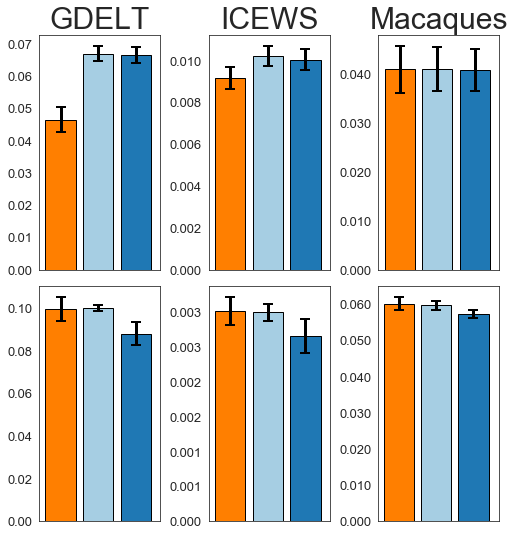

In [211]:
sns.set_style('white')

PGDS_COLOR = sns.color_palette("Paired")[7]
GPDPFA_COLOR = sns.color_palette("Paired")[5]
BPTF_COLOR = sns.color_palette("Paired")[10]
PRGDS0_COLOR = sns.color_palette("Paired")[0]
PRGDS1_COLOR = sns.color_palette("Paired")[1]

tPlot, axes = plt.subplots(nrows=2,
                           ncols=3, 
                           sharex=True, 
                           gridspec_kw={'height_ratios': [1,1],
                                        'width_ratios': [1,1,1]},
                           figsize=(7, 7.25))

width=2
space=width/4.

lines = []
labels = []
for row, metric in enumerate(['perp_s', 'perp_f']):
    for col, dataset in enumerate(['gdelt', 'icews', 'monkeybrains']):
        ax = axes[row][col]
        
        if row == 1 and col == 2:
            width = 2.1
        xtick = 0
        foo = df.loc[(df['model_type'] == 'pgds') & 
                     (df.experiment.apply(lambda x: dataset in x)) &
                     (df.experiment.apply(lambda x: 'structured' not in x)) & 
                     (df.experiment.apply(lambda x: 'periods6' in x))]

        vals = []
        for exper in foo.experiment.unique():
            bptf_val = float(np.min(bptf_df[bptf_df['experiment'] == exper][metric]))
            
#             if 'gdelt' in exper:
#                 bptf_val = 1.25 if metric == 'perp_s' else 1.58
            
            vals += [np.log(bptf_val)-np.log(x) for x in foo[foo['experiment'] == exper] [metric]]
    

        label = 'PGDS'
        line = ax.bar(xtick, np.nanmean(vals), yerr=np.nanstd(vals), label='PGDS', 
                      color=PGDS_COLOR, width=width, error_kw=dict(lw=3, capsize=5, capthick=2),
                      edgecolor='k')
        
        if row == 0 and col == 0:
            labels.append(label)
            lines.append(line)

        xtick += width + space
        for theta_eps, nu_eps, mtx_is_dirichlet in it.product([0,1],[1],[True]):

            foo = df.loc[(df['model_type'] == 'prgds-v2') & 
                         (df['theta_eps'] == theta_eps) & 
                         (df['nu_eps'] == nu_eps) & 
                         (df['mtx_is_dirichlet'] == mtx_is_dirichlet) &
                         (df.experiment.apply(lambda x: dataset in x)) &
                         (df.experiment.apply(lambda x: 'structured' not in x)) & 
                         (df.experiment.apply(lambda x: 'periods6' in x))]

            vals = []
            for exper in foo.experiment.unique():
                bptf_val = float(np.min(bptf_df[bptf_df['experiment'] == exper][metric]))
#                 if 'gdelt' in exper:
#                     bptf_val = 1.25 if metric == 'perp_s' else 1.58
                vals += [np.log(bptf_val)-np.log(x) for x in foo[foo['experiment'] == exper] [metric]]

            color = PRGDS0_COLOR if theta_eps==0 else PRGDS1_COLOR

            line = ax.bar(xtick, np.nanmean(vals), yerr=np.nanstd(vals), label=label, 
                          color=color, width=width,error_kw=dict(lw=3, capsize=5, capthick=2),
                          edgecolor='k')
            xtick += width + space
        
            if row == 0 and col == 0:
                labels.append(label)
                lines.append(line)
            
        if col in [1,2]:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

        if row == 0:
            title = dataset
            if title == 'gdelt':
                title = 'GDELT'
            elif title == 'icews':
                title = 'ICEWS'
            elif title == 'monkeybrains':
                title = 'Macaques'
            ax.set_title(title, fontsize=30)
        
        ax.set_xticks(np.arange(xtick))
        ax.set_xticklabels(())
        ax.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout(pad=0.0, h_pad=None, w_pad=None, rect=None)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.4, hspace=0.07)

plt.savefig('test_tensor_results.pdf', dpi=100, pad_inches=0.0, format='pdf')

In [179]:
np.log(np.array([float(x) for x in df.perp_f_nz]))


array([ 9.30661626,  9.22303441,  9.34860039,  9.43817042,  9.41092525,
        9.30612314,  9.4473544 ,  9.48198259,  9.53993772,  9.72405362,
        9.83913884, 10.08485815,  9.99250732,  9.86689647, 10.10008244,
        9.70309765,  9.61832286,  9.72668378,  9.41306458,  9.32981213,
        9.34442961,  9.32374573,  9.34114919,  9.43347911,  9.38411811,
        9.60977454,  9.66234236,  9.63135376,  9.90469189,  9.85011527,
       10.02529591,  9.85653275,  9.89957307,  9.74437901,  9.65706975,
        9.78365875,  9.33822648,  9.47716551,  9.14437862,  9.2276457 ,
       10.13520805,  9.97031934,  5.42045138,  5.47101806,  5.63141645,
        6.20020666,  5.58711728,  5.62185947,  5.68558914,  5.74765175,
        5.72983142,  5.73725306,  5.46761355,  5.52497862,  5.71608945,
        5.72650277,  5.37491748,  5.51617074,  5.62664481,  5.54644238,
        5.62816521,  5.6071728 ,  5.75692625,  5.73555719,  5.75761166,
        5.74504329,  5.44772364,  5.58638059,  5.74429972,  5.74

In [146]:
for row, metric in enumerate(['perp_s_nz', 'perp_f_nz']):
    for col, dataset in enumerate(['gdelt', 'icews', 'monkeybrains']):
        foo = df.loc[(df['model_type'] == 'pgds') & 
                     (df.experiment.apply(lambda x: dataset in x)) &
                     (df.experiment.apply(lambda x: 'structured' not in x)) & 
                     (df.experiment.apply(lambda x: 'periods6' in x))]
        print('\n---%s---\n' % dataset)
        
        vals = []
        for exper in foo.experiment.unique():
            bptf_val = float(bptf_df[bptf_df['experiment'] == exper][metric])
            vals += [np.log(x) - np.log(bptf_val) for x in foo[foo['experiment'] == exper] [metric]]
        print('\nPGDS')
        print(len(vals),np.mean(vals))

        for theta_eps, nu_eps, mtx_is_dirichlet in it.product([0,1],[1],[True]):
            vals = []
            foo = df.loc[(df['model_type'] == 'prgds-v2') & 
                         (df['theta_eps'] == theta_eps) & 
                         (df['nu_eps'] == nu_eps) & 
                         (df['mtx_is_dirichlet'] == mtx_is_dirichlet) &
                         (df.experiment.apply(lambda x: dataset in x)) &
                         (df.experiment.apply(lambda x: 'structured' not in x)) & 
                         (df.experiment.apply(lambda x: 'periods6' in x))]
            for exper in foo.experiment.unique():
                vals += [np.log(x) - np.log(bptf_val) for x in foo[foo['experiment'] == exper] [metric]]
            
            print('\nPRGDS-%d' % theta_eps)
            print(len(vals),np.mean(vals))   
                


---gdelt---


PGDS
6 -0.7170796825316667

PRGDS-0
6 -0.5235906464310841

PRGDS-1
6 -0.5563166211535342

---icews---


PGDS
6 -1.3177590570570763

PRGDS-0
6 -0.9754197244125247

PRGDS-1
6 -0.9785530866258053

---monkeybrains---


PGDS
6 0.15062828352793556

PRGDS-0
6 0.21167470794293264

PRGDS-1
6 0.20424100638056397

---gdelt---


PGDS
6 -2.910834205680878

PRGDS-0
6 -2.801331842982384

PRGDS-1
6 -2.137488704453803

---icews---


PGDS
6 -0.3568852650205047

PRGDS-0
6 0.5041257428114551

PRGDS-1
6 0.39611407518084435

---monkeybrains---


PGDS
6 0.5513282964110431

PRGDS-0
6 0.5605006951710374

PRGDS-1
6 0.5108305153035487


In [153]:
df['f-mase']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9                    NaN
10                   NaN
11                   NaN
12                   NaN
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                   NaN
23                   NaN
24                   NaN
25                   NaN
26                   NaN
27                   NaN
28                   NaN
29                   NaN
             ...        
66                   NaN
67                   NaN
68    1.2889760990623005
69    1.3132551725989787
70     0.727983918835699
71                   NaN
72                   NaN
73    1.3276681712271934
74                   NaN


In [133]:
foo = bar.loc[(bar.experiment == '/mnt/nfs/work1/wallach/aschein/results/thesis/icews/tensors/1995-2013-M/all/masked/periods6_length1_forecast2/1_experiment.npz')]
foo[['model_type','seed', 'nu_eps', 'theta_eps']]

,model_type,seed,nu_eps,theta_eps
42,pgds,617.0,1.0,0.0
43,pgds,781.0,1.0,0.0
44,prgds-v2,617.0,1.0,0.0
45,prgds-v2,781.0,1.0,0.0
46,prgds-v2,617.0,1.0,0.0
47,prgds-v2,781.0,1.0,0.0
48,prgds-v2,617.0,0.0,0.0
49,prgds-v2,781.0,0.0,0.0
50,prgds-v2,617.0,0.0,0.0
51,prgds-v2,781.0,0.0,0.0


In [110]:
df.experiment.unique()

array([Path('/mnt/nfs/work1/wallach/aschein/results/thesis/gdelt/tensors/2003-2008-M/all/masked/periods6_length1_forecast2/1_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/thesis/gdelt/tensors/2003-2008-M/all/masked/periods6_length1_forecast2/2_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/thesis/gdelt/tensors/2003-2008-M/all/masked/periods6_length1_forecast2/3_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/thesis/icews/tensors/1995-2013-M/all/masked/periods6_length1_forecast2/1_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/thesis/icews/tensors/1995-2013-M/all/masked/periods6_length1_forecast2/2_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/thesis/icews/tensors/1995-2013-M/all/masked/periods6_length1_forecast2/3_experiment.npz'),
       Path('/mnt/nfs/work1/wallach/aschein/results/prgds/tensors/monkeybrains/20ms/all/masked/periods6_length1_forecast2/1_experiment.npz'),


In [195]:
for exp in bptf_df.experiment.unique():
    if 'gdelt' in exp:
        print(bptf_df[bptf_df.experiment == exp].perp_f)

4    1.72863
Name: perp_f, dtype: float64
6    1.730367
Name: perp_f, dtype: float64
9    1.719704
Name: perp_f, dtype: float64
